## Work sample, including: 

### - Logistic regression for classification
 
### - Cross validation
 
### - Grid search

###### This challenge required the following machine learning techniques: logistic regression for classification, cross validation, and grid search.
###### All the solutions shown here were developed by me on my own, using my own references, and not those that were provided with the challenge, which is apparent when compared to the source (link below). 

**Note:** Adapted from [Lab 5 in the CS109](https://github.com/cs109/2015lab5) course.

We turn our attention to **classification**. Classification tries to predict, which of a small set of classes, an observation belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $\x$. For instance, consider predicting gender from seeing a person's face, something we do fairly well as humans. To have a machine do this well, we would typically feed the machine a bunch of images of people which have been labelled "male" or "female" (the training set), and have it learn the gender of the person in the image from the labels and the *features* used to determine gender. Then, given a new photo, the trained algorithm returns us the gender of the person in the photo.

There are different ways of making classifications. One idea is shown schematically in the image below, where we find a line that divides "things" of two different types in a 2-dimensional feature space. The classification show in the figure below is an example of a maximum-margin classifier where construct a decision boundary that is far as possible away from both classes of points. The fact that a line can be drawn to separate the two classes makes the problem *linearly separable*. Support Vector Machines (SVM) are an example of a maximum-margin classifier.

![Splitting using a single line](images/onelinesplit.png)



## Classification Example Using `sklearn`: Heights and Weights

We'll use a dataset of heights and weights of males and females to hone our understanding of classifiers. We load the data into a dataframe and plot it.

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection


In [4]:
df = pd.read_csv("data/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<ul>
  <li> <b></b> Create a scatter plot of Weight vs. Height
  <li> <b></b> Color the points differently by Gender
</ul>
</div>

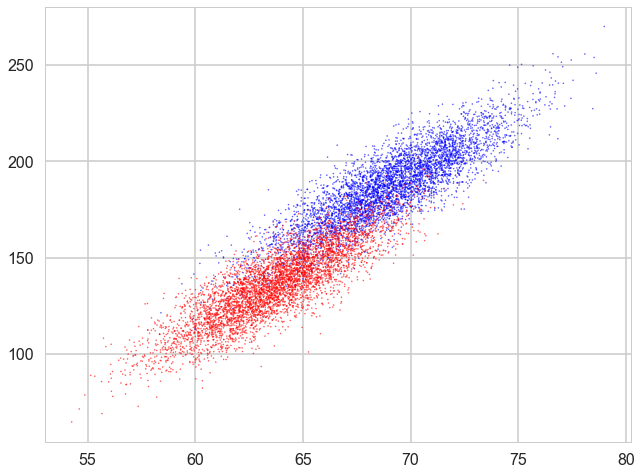

In [37]:
df = df.dropna(subset=['Gender'])
plt.figure(figsize =(10.5, 8))
mapping = {'Male' : 'blue', 'Female' : 'red'}
plt.scatter(df['Height'], df['Weight'], alpha=0.5, s=1.25, c=df['Gender'].map(mapping))


* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split tinto a training and test set. Target variable is gender male.
X_train, X_test, y_train, y_test = train_test_split(df[['Height','Weight']].values, 
                                              (df.Gender == "Male").values,random_state=5)

clf = LogisticRegression() # classifier in use is logistic regression; fit it on training data
clf.fit(X_train, y_train)

# When applied to the test data, how many (as a proportion) are correctly classified, i.e., as male
print(accuracy_score(clf.predict(X_test), y_test))

0.9252


### Tuning the Model: Perform model tuning and selecting the regularization parameter 

<div class="span5 alert alert-info">
<b>Exercise: Implement the following search procedure to find a good model</b>
<ul>
<li> You are given a list of possible values of `C` below
<li> For each C:
  <ol>
  <li> Create a logistic regression model with that value of C
  <li> Find the average score for this model using the `cv_score` function **only on the training set** `(X_train, y_train)`
  </ol>
<li> Pick the C with the highest average score
</ul>
Your goal is to find the best model parameters based *only* on the training set, without showing the model test set at all (which is why the test set is also called a *hold-out* set).
</div>

In [ ]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]



In [36]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=5)
modelCV = LogisticRegression(C=.0001)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy with C at .0001: %.7f" % (results.mean()))

5-fold cross validation average accuracy with C at .0001: 0.9158667


In [28]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=5)
modelCV = LogisticRegression(C=.001)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy with C at .001: %.7f" % (results.mean()))

5-fold cross validation average accuracy with C at .001: 0.9169333


In [35]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=5)
modelCV = LogisticRegression(C=0.1)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy with C at 0.1: %.7f" % (results.mean()))

5-fold cross validation average accuracy with C at 0.1: 0.9170667


In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=5)
modelCV = LogisticRegression(C=1)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy with C at 1: %.7f" % (results.mean()))

5-fold cross validation average accuracy with C at 1: 0.9170667


In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=5)
modelCV = LogisticRegression(C=10)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy with C at 10: %.7f" % (results.mean()))

5-fold cross validation average accuracy with C at 10: 0.9170667


In [32]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=5)
modelCV = LogisticRegression(C=100)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy with C at 100: %.7f" % (results.mean()))

5-fold cross validation average accuracy with C at 100: 0.9170667


In [33]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=5)
modelCV = LogisticRegression(C=0.000001)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy with C at 0.000001: %.7f" % (results.mean()))

5-fold cross validation average accuracy with C at 0.000001: 0.6548000


###### Pick the C with the highest average score
###### All Cs above 0.1 had the same highest average score of 0.9170667

<div class="span5 alert alert-info">
**Exercise:** Estimate how this model will predict on unseen data.
<ol>
<li> Use the C you obtained from the procedure earlier and train a Logistic Regression on the training data
<li> Calculate the accuracy on the test data
</ol>

<p>This particular value of `C` may or may not do as well as simply running the default model on a random train-test split. </p>

<ul>
<li> Q1: Do you think that's a problem? 
<li> Q2: Why do we need to do this whole cross-validation and grid search stuff anyway?
</ul>

</div>

In [38]:
logreg=LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.917
Test set score: 0.925


###### The particular value of `C` may or may not do as well as simply running the default model on a random train-test split. 
###### Q1: Do you think that's a problem? 

###### No, it's not a problem. It just means regularization, in this case, doesn't have much of an affect. This makes sense, because there are not a lot of features

###### Q2: Why do we need to do this whole cross-validation and grid search stuff anyway?
###### For instances when there are more features and there is a risk of a model overfitting the training data.

### Black Box Grid Search in `sklearn`

Scikit-learn, as with many other Python packages, provides utilities to perform common operations so you do not have to do it manually. It is important to understand the mechanics of each operation, but at a certain point, you will want to use the utility instead to save time...

<div class="span5 alert alert-info">
<h3></h3>
<b>Exercise:</b> Use scikit-learn's GridSearchCV tool to perform cross validation and grid search. 

* Find the best model over the training set. 
* Does it give you the same best value of `C`?
* How does this model you've obtained perform on the test set?</div>


In [66]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [67]:
from sklearn.model_selection import GridSearchCV


In [68]:

from sklearn.linear_model import LogisticRegression

In [69]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(df[['Height','Weight']].values, 
                                              (df.Gender == "Male").values,random_state=5)

In [71]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
print("Test set score: {:.3f}".format(grid_search.score(X_test, y_test)))


Test set score: 0.926


In [63]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 0.001}
Best cross-validation score: 0.92


In [64]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Best estimator:
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [65]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())


C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\rmbrm\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004787,0.000199,0.915333,0.916333,0.0001,{'C': 0.0001},7,0.912059,0.916986,0.912059,0.916653,0.920667,0.915500,0.916611,0.916181,0.915277,0.916347,0.000747,0.000399,0.003211,0.000499
1,0.006383,0.000199,0.917200,0.916967,0.001,{'C': 0.001},1,0.914724,0.917986,0.915390,0.917153,0.920000,0.916167,0.919947,0.916181,0.915944,0.917347,0.001353,0.000399,0.002297,0.000704
2,0.005785,0.000198,0.916800,0.917067,0.01,{'C': 0.01},6,0.913391,0.918153,0.916722,0.916819,0.920000,0.916500,0.918612,0.916514,0.915277,0.917347,0.000749,0.000397,0.002344,0.000624
3,0.004588,0.000200,0.916933,0.917100,0.1,{'C': 0.1},2,0.913391,0.917986,0.917388,0.916986,0.920000,0.916833,0.918612,0.916681,0.915277,0.917014,0.000798,0.000399,0.002355,0.000459
4,0.005385,0.000399,0.916933,0.917100,1,{'C': 1},2,0.913391,0.917986,0.917388,0.916986,0.920000,0.916833,0.918612,0.916681,0.915277,0.917014,0.000798,0.000489,0.002355,0.000459


###### Does it give you the same best value of C?
###### NO, when carried to the seventh decimal, it doesn't. But to the third decimal, the cutoff for the value of C being the same is the same as above
###### How does this model you've obtained perform on the test set?
###### It performs very well on the test set, and the same as above, to one-one thousandth.
* 